<img src="resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2024 </h1> 
<h3 align="center">Day 3 2024 - Neuron Morphology</h3> 
<h3 align="center">Notebook 4: Analyzing Brain Connectivity via Projections of Light Microscopy Neurons</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 1: Introduction

<font size="4"> The main objective of this notebook is to analyze the <em>projections</em> of Light Microscopy (LM) neurons, meaning the regions of the brain that the axons and dendrites traverse to communicate their inputs/outputs via the endpoints. This type of long-range projection analysis is only applicable for the LM neurons since the EM neurons were reconstructed within a small piece of tissue fully contained within the visual cortex. In contrast, we will see that many LM neurons have axons that project across many brain regions, see Figure 1.  </font>


<div style="text-align: center;">
    <img src='imgs/lm-vs-em.png' style="max-width: 65%; height: auto;">
</div>

<font size="4"><b> Figure 1:</b> LM neuron shown in blue and EM neuron shown in purple.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4"> As an introduction to analyzing projections of LM neurons, we will explore three open-ended questions related to brain connectivity that scientists consider when analyzing LM neurons. These questions aim to uncover both the fundamental connections and complex network dynamics that define the functional roles of these neurons within the broader neural circuitry. 

<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 1:</strong> What do the inputs to a particular brain region look like? </font>

<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 2:</strong>  Where else do those inputs send their collaterals?  </font>
    
    
<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 3:</strong> Are neuronal morphologies stereotyped, or are there distinct projection classes?

<font size="4"> These questions involve analyzing a large number of neurons to provide a general overview of how neurons <em>connect</em> different brain regions. In addition, these quetions build upon each other so Question 3 is easier to anser once Question 2 (and Question 1) is "ansered".  Before addressing these questions, we must first understand the meaning of <em>connectivity</em> at the level of a single neuron, then generalize this notion to the level of brain regions. In this context a neuron connects regions <em>A</em> and <em>B</em> if the neuron has dendritic endpoints in region <em>A</em> and axonal endpoints in region <em>B</em>. The dendritic endpoints receive the <em>input</em> of a neuron, whereas the axonal endpoints send the neuron's output.

<font size="4"> Brain regions being <em>connected</em> refers to the existence of many neurons between these region where information is transmitted either in one or both directions. Given some brain region of interest, the inputs to this region are delivered via axonal endpoints and received by dendritic endpoints. Therefore, we can identify connected regions by extracting all axonal endpoints within a given region and determining the corresponding region of the soma.
    
<font size="4"> Given a soma that projects one of these axons of interest, the refer to the additional axons originating from the same soma that transmit information to various other brain regions. This analysis leads to the follow up Question 3 which is asking whether the projections from somas consistent in the sense that other somas in the same region project to similar areas? By the end of this notebook, we will have developed the skills to answer these questions but also explore the data in a manner that leads to further analysis.


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<font size="4"> In this notebook, we use a python package called "brainglobe_atlasapi" which provides an API for querying information from the CCF atlas. We'll begin by downloading the Allen Mouse CCF with this package, then print out a lookup table that we use to query information about regions in this brain atlas.  </font>

In [1]:
from brainglobe_atlasapi import BrainGlobeAtlas
from utils.graph_utils import get_ccf_id_by_depth
from pprint import pprint


def get_ccf_name(ccf_id, depth=None):
    # Check for depth
    if depth:
        ccf_id = get_ccf_id_by_depth(ccf_id, depth)

    # Return name
    idx = ccf_atlas.lookup_df["id"] == ccf_id
    return ccf_atlas.lookup_df.loc[idx, "name"].iloc[0] if any(idx) else ccf_id


# Load the CCF structure data as a DataFrame
ccf_atlas = BrainGlobeAtlas('allen_mouse_100um')
ccf_atlas.lookup_df.head()


,acronym,id,name
0,root,997,root
1,grey,8,Basic cell groups and regions
2,CH,567,Cerebrum
3,CTX,688,Cerebral cortex
4,CTXpl,695,Cortical plate


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4"> The ccf ids are stored as integers in a meshparty skeleton, so we'll use the function "get_ccf_name" to get the name of the region corresponding to a given id. Here is a simple example of using this function: </font>
    

In [2]:
# Report brain region
ccf_id = ccf_atlas.lookup_df["id"].sample().iloc[0]
print(f"The CCF ID '{ccf_id}' represents the '{get_ccf_name(ccf_id)}'")
pprint(ccf_atlas.structures[ccf_id])


The CCF ID '105' represents the 'Superior olivary complex, medial part'
{'acronym': 'SOCm',
 'id': 105,
 'mesh': None,
 'mesh_filename': PosixPath('/root/.brainglobe/allen_mouse_100um_v1.2/meshes/105.obj'),
 'name': 'Superior olivary complex, medial part',
 'rgb_triplet': [255, 174, 111],
 'structure_id_path': [997, 8, 343, 1065, 771, 1132, 398, 105]}


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
    
<font size="4"> This function also has an optional argument called "depth" that traverses the region hierarchy to return the name of the region name for the given depth. </font>

In [3]:
# Report hierarchy
depth = 4
print("CCF Region:", get_ccf_name(ccf_id))
print("Ancestors of CCF Regions:", ccf_atlas.get_structure_ancestors(ccf_id))
print("Descendants of CCF Regions:", ccf_atlas.get_structure_descendants(ccf_id))
print(f"CCF Region at Depth {depth}:", get_ccf_name(ccf_id, depth=depth))


CCF Region: Superior olivary complex, medial part
Ancestors of CCF Regions: ['root', 'grey', 'BS', 'HB', 'P', 'P-sen', 'SOC']
Descendants of CCF Regions: []
CCF Region at Depth 4: Pons


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<font size="4"><p><b>Exercise 1.1:</b>  Find the most fine-grained brain region contained in the CCF (i.e. region at the largest depth).
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<font size="4"><p><b>Exercise 1.2:</b>  How many brain regions are at a depth=0, 1,..., n where n is the depth value from Task 1.1.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 2: Analyzing the Inputs to a Brain Region


### Imports

In [4]:
from random import sample
from utils.graph_utils import get_ccf_ids, get_connectivity_matrix
from utils.skeleton_loading_utils import number_of_samples, load_lm_datasets 

import matplotlib.pyplot as plt
import numpy as np
import skeleton_plot as skelplot
import seaborn as sns

%matplotlib inline


### Load Dataset

In [5]:
skel_list = load_lm_datasets()


Loading datasets...
exaSPIM_651324_2023-03-06_15-13-25_reconstructions:  [==================================================] 13/13
exaSPIM_653158_2023-06-01_20-41-38_reconstructions:  [==================================================] 42/42
exaSPIM_653980_2023-08-10_20-08-29_reconstructions:  [==================================================] 20/20
mouselight_reconstructions:  [==================================================] 1549/1549


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## Connectivity of a Single Neuron

<font size="4"> Our journey to understand how the brain is connected begins with analyzing how a single neuron connects different regions. The purpose of this elementary analysis is to introduce a set of routines that simplify querying information such as finding all neurons with somas in a certain ccf region. We'll begin by choosing a skeleton from our dataset and performing the following query:
        
<font size="4"><strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Query 1:</strong> Which brain regions do the dendritic or axonal endpoints of a given neuron reside in? </font>

<font size="4"> Each skeleton has a node-level attribute called "id" that specifies where a node is located in ccf space. We will use subroutine called "get_ccf_ids" which is stored in "graph_utils.py". The purpose of this routine is to easily extract the ccf ids from vertices within a certain compartment (e.g. axons or dendrites) and/or vertices which are end points or branch points, see documentation for more details. Next, let's look at some simple examples of using the routine "get_ccf_ids" to determine what brain regions our skeleton passes through. </font>

In [16]:
# Subroutines
def report_distribution(values, cnt_threshold=0, percent_threshold=0, return_counts=False):
    ids, cnts = np.unique(values, return_counts=True)
    stat_symbol = "#" if return_counts else "%"
    item = "Neurons" if return_counts else "Vertices"
    print(f"{stat_symbol} {item}   CCF Region")
    for idx in np.argsort(-cnts):
        percent = 100 * cnts[idx] / len(values)
        ccf_id = get_ccf_name(ids[idx])
        if percent >= percent_threshold and cnts[idx] > cnt_threshold:
            value = cnts[idx] if return_counts else round(percent, 4)
            print(f"{value}      {ccf_id}")


# Choose a skeleton
skel = skel_list[0]
# skel = sample(skel_list, 1)[0]
            
# Root - CCF Compartment
soma_ccf = get_ccf_ids(skel, compartment_type=1)
print("Soma is in the", get_ccf_name(soma_ccf[0]))

# Dendrite Endpoints - CCF Regions
print("\nDistribution of CCF Regions of Dendritic Endpoints...")
dendrite_endpoints_ccf = get_ccf_ids(skel, compartment_type=3, vertex_type="end_points")
report_distribution(dendrite_endpoints_ccf, percent_threshold=1)

# Axon Endpoints - CCF Regions
print("\nDistribution of CCF Regions of Axonal Endpoints...")
axon_endpoints_ccf = get_ccf_ids(skel, compartment_type=2, vertex_type="end_points")
report_distribution(axon_endpoints_ccf, percent_threshold=1)

Soma is in the Nucleus prepositus

Distribution of CCF Regions of Dendritic Endpoints...
% Vertices   CCF Region
50.0      Dorsal motor nucleus of the vagus nerve
37.5      Medulla
12.5      choroid plexus

Distribution of CCF Regions of Axonal Endpoints...
% Vertices   CCF Region
19.6653      Periaqueductal gray
11.2971      Parabrachial nucleus
7.113      Medulla
5.8577      Paragigantocellular reticular nucleus, lateral part
5.0209      Pontine reticular nucleus, caudal part
5.0209      Nucleus raphe magnus
4.1841      superior cerebelar peduncles
4.1841      Tegmental reticular nucleus
3.7657      Gigantocellular reticular nucleus
3.3473      Midbrain reticular nucleus
2.9289      Parapyramidal nucleus
2.9289      fourth ventricle
2.5105      Facial motor nucleus
2.5105      Magnocellular reticular nucleus
2.5105      Pontine reticular nucleus
2.5105      choroid plexus
2.0921      Nucleus of the solitary tract
1.6736      Paragigantocellular reticular nucleus, dorsal part
1.2552  

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4">Note: You may encounter a neuron that passes through "nan" or some integer valued region which are not valid ccf regions. This discrepancy is caused by minor misalignments of the brain sample to the ccf template caused during registration. </font>

(8362117.0, 13678733.0, 8627198.0, 2973464.0)

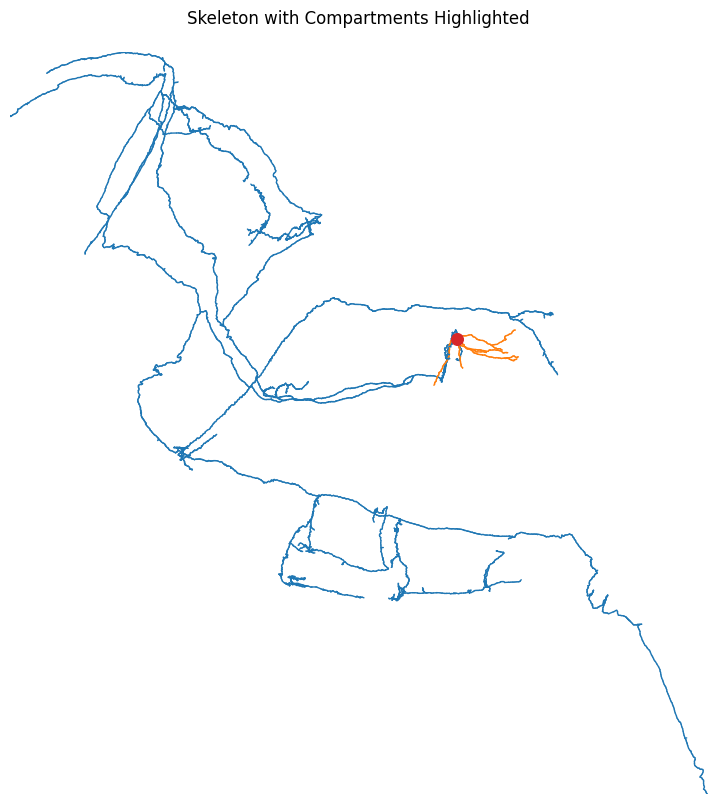

In [8]:
# Plot skeleton
f, ax = plt.subplots(figsize=(9, 14))
skelplot.plot_tools.plot_skel(
    skel,
    title="Skeleton with Compartments Highlighted\n",
    line_width=1,
    plot_soma=True,
    soma_size=70,
    pull_radius=True,
    invert_y=True,
    pull_compartment_colors=True,
    x="x",
    y="y",
    skel_color_map={1: "tab:red", 2: "tab:blue", 3: "tab:orange"},
)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<font size="4"><p><b>Exercise 2.1:</b> The routine "get_ccf_ids" has an optional argument called "depth" which takes queried ccf ids and maps them to the corresponding ccf ids at the specified level of the structure hierarchy. Write a routine that iterates over all of the possible depths for a neuron and prints out the number of regions that the neuron traverses for a given depth. How does this number change as you increase the depth?
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    
<font size="4"><p><b>Exercise 2.2:</b>  Find the neurons that project across the fewest and largest number of brain regions at a fixed depth (i.e. choose a depth less than 6).
    
</div>

In [10]:
#### put collateral analysis here

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
## Connectivity Between Brain Regions

<font size='4'> Next let's analyze the projection patterns of neurons in our dataset to understand the connections between different brain regions. We’ll start by identifying the locations of the somas of the neurons, then analyze the brain regions where these neurons are present. The location of the soma is important because it is highly correlated with where the neuron's dendrites are concentrated, which can influence its connectivity and functional role within the brain. By mapping these locations, we can gain insights into the neural circuits and how they contribute to overall brain function. </font>


### Soma Locations

In [17]:
# Get ccf ids of somas --> raw counts and threshold by some min # skeletons in region
soma_ccf_ids = [get_ccf_ids(skel, compartment_type=1, depth=7)[0] for skel in skel_list]
print("Distribution Somas Locations...")
report_distribution(soma_ccf_ids, cnt_threshold=20, return_counts=True)


Distribution Somas Locations...
# Neurons   CCF Region
313      Secondary motor area
76      Subiculum
62      Presubiculum
53      Primary motor area
53      Dentate gyrus
46      Ventral posterior complex of the thalamus
45      Ventral anterior-lateral complex of the thalamus
41      Ammon's horn
39      Pontine gray
33      Anterior cingulate area, dorsal part
30      Postsubiculum
26      Spinal nucleus of the trigeminal, interpolar part
23      dorsal hippocampal commissure
21      Mediodorsal nucleus of thalamus


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size='4'> Let's sample a brain region that contains at least 20 somas from our dataset, then analyze the projections of these neurons. We'll use a function called "sample_soma_location" which takes the variables "soma_ccf_ids" and "min_cnt", then samples a ccf id with at least "min_cnt" appearances in "soma_ccf_ids". Once we have selected a brain region, we'll simply print out the distribution of regions that contain endpoints of these neurons before proceeding to visualizing the connectivity.
    

In [12]:
def sample_soma():
    ids, cnts = np.unique(soma_ccf_ids, return_counts=True)
    if not any(cnts >= min_cnt):
        print(f"Warning: No ccf region with {min_cnt} somas, returning region with most somas!\n")
        return ids[np.argmax(cnts)]
    else:
        return sample(ids[cnts >= min_cnt].tolist(), 1)[0]


# Sample ccf_id and extract skeletons with soma with that ccf region
min_cnt = 30
ccf_id = 629.0  # sample_soma()  # 629.0
skels_subset = [skel for skel in skel_list if skel.vertex_properties['ccf'][skel.root] == ccf_id]
print(f"# Skeletons with Soma in {get_ccf_name(ccf_id)}:", len(skels_subset))

# Get ccf regions of endpoints
axon_endpoints_ccf = list()
dendrite_endpoints_ccf = list()
for skel in skels_subset:
    axon_endpoints_ccf.extend(get_ccf_ids(skel, compartment_type=3, vertex_type="end_points").tolist())
    dendrite_endpoints_ccf.extend(get_ccf_ids(skel, compartment_type=2, vertex_type="end_points").tolist())

# Report distribution
print("\nDistribution of Dendrite Endpoints in CCF Space...")
report_distribution(dendrite_endpoints_ccf, percent_threshold=1)

print("\nDistribution of Axon Endpoints in CCF Space...")
report_distribution(axon_endpoints_ccf, percent_threshold=1)


# Skeletons with Soma in Ventral anterior-lateral complex of the thalamus: 45

Distribution of Dendrite Endpoints in CCF Space...
% Vertices   CCF Region
15.5127      Secondary motor area, layer 5
12.1232      Primary motor area, Layer 5
9.7999      Primary motor area, Layer 2/3
9.6551      Secondary motor area, layer 2/3
4.8901      Secondary motor area, layer 6a
4.7519      Primary motor area, Layer 6a
4.0806      Secondary motor area, layer 1
3.7515      Caudoputamen
3.0736      Ventral medial nucleus of the thalamus
2.297      Primary motor area, Layer 1
1.5138      Ventral anterior-lateral complex of the thalamus
1.3624      526157184.0
1.1847      Primary somatosensory area, mouth, layer 2/3
1.1386      Primary somatosensory area, upper limb, layer 5
1.007      Supplemental somatosensory area, layer 5

Distribution of Axon Endpoints in CCF Space...
% Vertices   CCF Region
73.046      Ventral anterior-lateral complex of the thalamus
6.6379      Posterior complex of the thalamus
5.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise 3.1:</b> Recall that we found which neurons traversed most and least brain regions in Exercise 2.2. Is this typical of neurons with somas in those same regions?
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Next, let's compute a connectivity matrix and visualize it as a heatmap by using the Python library "seaborne". In this matrix, each row corresponds to a neuron and the columns represent different brain regions. The entry at each ("row", "column") position is the number of endpoints that the neuron in "row" has within the brain region specified by that column. We'll generate this matrix with a routine called "get_connectivity_matrix" that takes "skels_subset" as an input, then returns the described connectivity matrix. </font>
    

### Connectivity Matrix

In [13]:
#### make a heat strip instead of printing distribution.

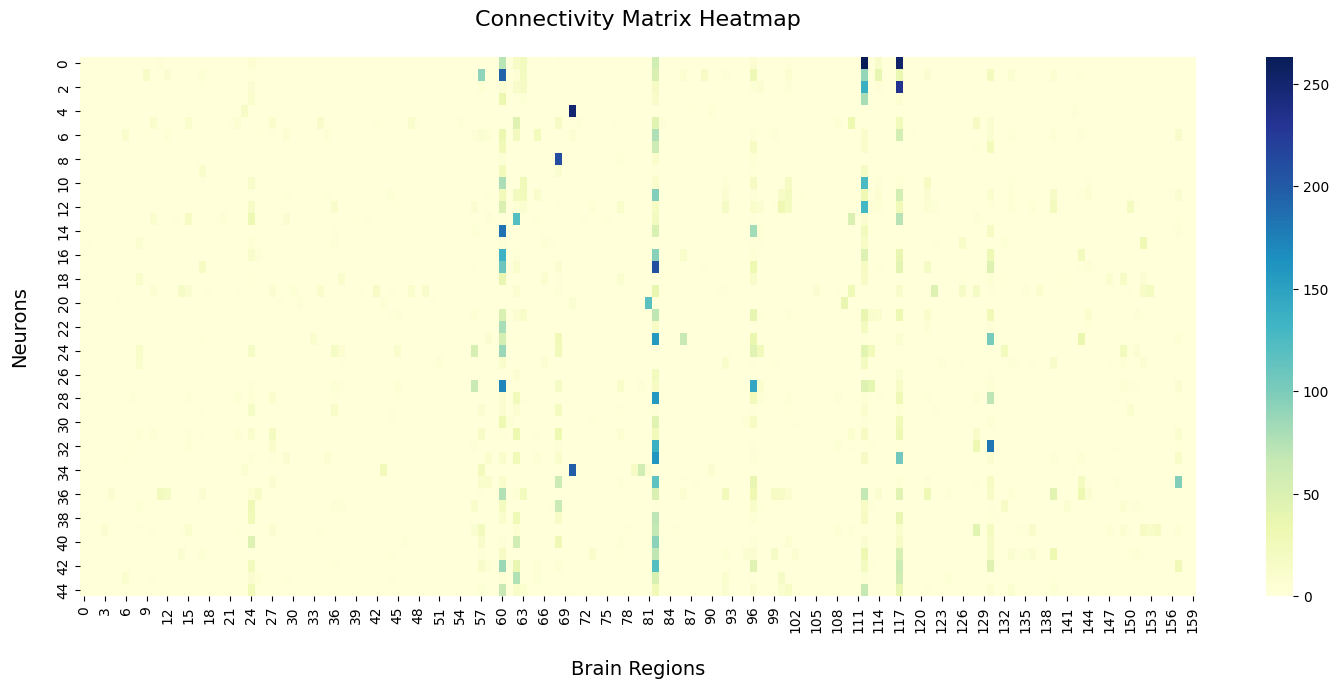

In [14]:
def plot_heatmap(matrix):
    # Initialize figure
    plt.figure(figsize=(18, 7))
    sns.heatmap(connectivity_matrix, cmap='YlGnBu')

    # Add labels and title
    plt.title('Connectivity Matrix Heatmap\n', fontsize=16)
    plt.xlabel('\nBrain Regions', fontsize=14)
    plt.ylabel('Neurons\n', fontsize=14)

    # Display the heatmap
    plt.show()


connectivity_matrix, idx_to_region = get_connectivity_matrix(skels_subset)
plot_heatmap(connectivity_matrix)


# add region names to plot
# add option to choose max_depth

# Is there a correlation between where these neurons branch?



<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise 3.2:</b> In the connectivity heat map above, we visualize the distribution of where the axonal endpoints are located. What do you think the corresponding heatmap would look like for the dendritic endpoints?
    
</div>

### PCA with Connectivity Vectors

In [15]:
# run pca on binary/cnt vector of regions that endpoints fall into
